In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [7]:
confirmed.set_index('Country/Region').loc['China'].sum().tail()

7/11/20    85071
7/12/20    85117
7/13/20    85117
7/14/20    85226
7/15/20    85246
dtype: object

In [8]:
is_china = confirmed['Country/Region'] == "China"
is_china.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [9]:
 confirmed['is_china'] = is_china

In [10]:
confirmed.query('is_china==True')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,is_china
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,True
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,929,929,929,929,929,929,929,929,929,True
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,582,582,582,582,582,582,582,583,583,True
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,363,363,363,363,363,363,363,363,363,True
53,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,167,167,167,167,167,167,167,167,167,True
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1645,1647,1647,1647,1648,1650,1650,1650,1650,True
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,True
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,True
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,171,171,171,171,171,171,171,171,171,True
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,349,349,349,349,349,349,349,349,349,True


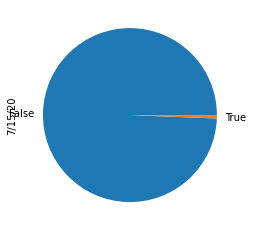

In [14]:
confirmed.groupby('is_china').sum().iloc[:,-1].plot(kind='pie')

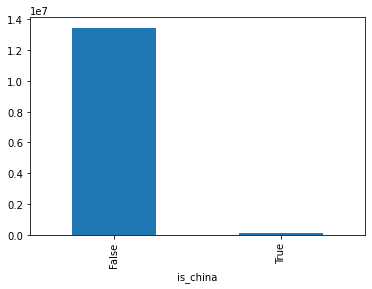

In [15]:
confirmed.groupby('is_china').sum().iloc[:,-1].plot(kind='bar')

# No dia 02/03/2020 china tinha 8 vezes o número de casos que o resto.Isto é injusto pois estamos resumindo as informações e com isso, perdendo elas.
Mas olhar uma fotograia é muito limitado, queremos ver também como anda esse crescimento.

In [20]:
confirmed['is_china_label'] = np.where(confirmed['is_china'],'China','Outros')
display(confirmed.head())
display(confirmed.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,is_china,is_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,33594,33908,34194,34366,34451,34455,34740,34994,False,Outros
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3106,3188,3278,3371,3454,3571,3667,3752,False,Outros
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,17348,17808,18242,18712,19195,19689,20216,20770,False,Outros
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,858,861,862,False,Outros
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,386,396,458,462,506,525,541,576,False,Outros


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,is_china,is_china_label
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,724,726,727,727,729,732,732,737,False,Outros
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1318,1356,1380,1389,1465,1498,1516,1526,False,Outros
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,313,314,314,317,317,317,321,321,False,Outros
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,6364,6410,6457,6506,6552,6596,6643,6695,False,Outros
265,NaN,Lesotho,-29.610000,28.233600,0,0,0,0,0,0,...,91,134,184,184,233,245,256,256,False,Outros


Text(0.5, 1.0, 'Gráfico com problema')

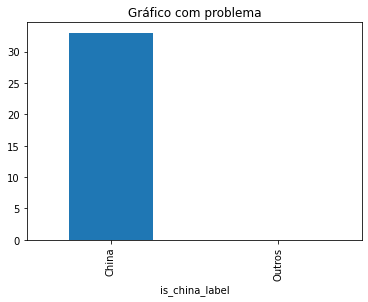

In [22]:
confirmed.groupby('is_china_label').sum().iloc[:,-1].plot(kind='bar')
plt.title('Gráfico com problema')

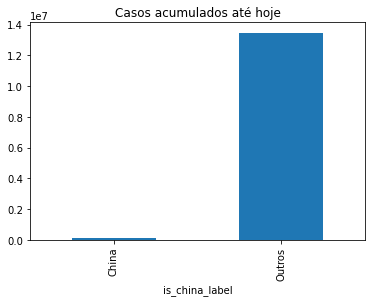

In [23]:
summed = confirmed.groupby('is_china_label').sum()
summed['delta'] = summed.iloc[:,-1]+summed.iloc[:,-2]
summed['delta'].plot(kind='bar')
plt.title(f"Casos acumulados até hoje")
plt.show()

In [24]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,is_china,is_china_label
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,33594,33908,34194,34366,34451,34455,34740,34994,False,Outros
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3106,3188,3278,3371,3454,3571,3667,3752,False,Outros
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,17348,17808,18242,18712,19195,19689,20216,20770,False,Outros
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,858,861,862,False,Outros
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,386,396,458,462,506,525,541,576,False,Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,724,726,727,727,729,732,732,737,False,Outros
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1318,1356,1380,1389,1465,1498,1516,1526,False,Outros
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,313,314,314,317,317,317,321,321,False,Outros
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,6364,6410,6457,6506,6552,6596,6643,6695,False,Outros


Text(0.5, 1.0, 'Desenvolvimento de casos confirmados com o passar do tempo')

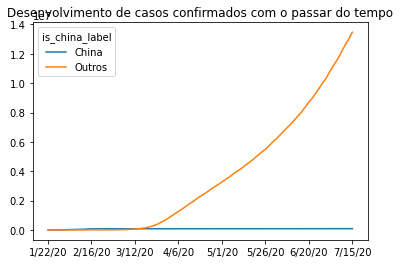

In [30]:
summed.T[2:-2].plot()
plt.title('Desenvolvimento de casos confirmados com o passar do tempo')

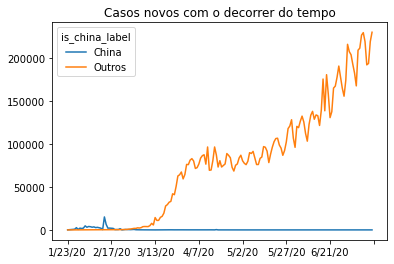

In [34]:
diferencas = summed.T[2:-2].diff().dropna()
diferencas.plot()
plt.title('Casos novos com o decorrer do tempo')
plt.show()

In [44]:
cases = confirmed.groupby('is_china_label').sum().iloc[:,-1].loc['China']
estimated_population = 1437525520
(cases/estimated_population)*100000

0.0022956114198236983

Conta péssima, está contando toda as pessoas.

### População mundial

In [50]:
un_population = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')
un_population['PopTotal'] = un_population['PopTotal']*1000
un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [51]:
un_population.describe()

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,280932.000000,280932.000000,280932.000000,280932.000000,2.508760e+05,2.508760e+05,2.809320e+05,280932.000000
mean,703.125062,22.411345,2051.026494,2051.526494,2.324362e+05,2.298754e+05,4.128536e+08,426.659040
std,631.959759,55.972847,33.642148,33.642148,6.938837e+05,6.829825e+05,1.308911e+09,2418.990784
min,4.000000,2.000000,1950.000000,1950.500000,6.812000e+00,6.889000e+00,1.510000e+02,0.052000
25%,300.000000,2.000000,2031.000000,2031.500000,1.847834e+03,1.860604e+03,1.240100e+06,34.205250
50%,586.000000,5.000000,2055.000000,2055.500000,1.136849e+04,1.164585e+04,1.420555e+07,91.590000
75%,903.000000,9.000000,2078.000000,2078.500000,8.526402e+04,8.648854e+04,1.171661e+08,216.985750
max,5501.000000,207.000000,2100.000000,2100.500000,1.092000e+07,1.071273e+07,2.163274e+10,56025.839000


In [54]:
un_population_total = un_population.query('Time==2019')[['Location','PopTotal']].set_index('Location')
un_population_total.head()

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [57]:
def latest_by_country(data):
    return data.groupby('Country/Region').sum().iloc[:,-1]
information = [latest_by_country(deaths),latest_by_country(recovered),latest_by_country(confirmed)]
combined = pd.concat(information,axis=1)
combined.columns = ['deaths','confirmed','recorvered']
combined.head()

,deaths,confirmed,recorvered
Country/Region,,,
Afghanistan,1094,22456,0.0
Albania,101,2091,0.0
Algeria,1040,14792,0.0
Andorra,52,803,0.0
Angola,27,124,0.0


In [69]:
combined.join(un_population_total).sort_values('confirmed',ascending=False)

,deaths,confirmed,recorvered,PopTotal,location_for_who
Brazil,75366,1350098,0.0,2.110495e+08,Brazil
US,137407,1075882,0.0,NaN,NaN
India,24914,612768,0.0,1.366418e+09,India
Russia,11753,522375,0.0,NaN,NaN
Chile,7186,292085,0.0,1.895204e+07,Chile
...,...,...,...,...,...
Holy See,0,12,0.0,8.150000e+02,Holy See
Papua New Guinea,0,8,0.0,8.776119e+06,Papua New Guinea
Western Sahara,1,8,0.0,5.824580e+05,Western Sahara
Sweden,5572,0,0.0,1.003639e+07,Sweden


In [60]:
un_population_total.index

Index(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa', 'African Union: Eastern Africa',
       'African Union: Northern Africa', 'African Union: Southern Africa',
       'African Union: Western Africa',
       'African, Caribbean and Pacific (ACP) Group of States',
       ...
       'Western Africa', 'Western Asia', 'Western Europe',
       'Western European and Others Group (WEOG)', 'Western Sahara', 'World',
       'World Bank Regional Groups (developing only)', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Location', length=477)

In [64]:
un_population.query("Location.str.contains('China') and Time==2019")

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
47893,156,China,2,Medium,2019,2019.5,735624.259,698159.433,1.433784e+09,152.722
48777,1105,China (and dependencies),2,Medium,2019,2019.5,751174.575,714459.601,1.465634e+09,155.510
48928,344,"China, Hong Kong SAR",2,Medium,2019,2019.5,3418.487,4017.670,7.436157e+06,7082.054
49812,446,"China, Macao SAR",2,Medium,2019,2019.5,307.706,332.740,6.404460e+05,21419.599
50696,158,"China, Taiwan Province of China",2,Medium,2019,2019.5,11824.123,11949.758,2.377388e+07,671.389
140008,948,"Less developed regions, excluding China",2,Medium,2019,2019.5,2518843.362,2458360.347,4.977204e+09,69.541
208293,2093,"SIDS Atlantic, and Indian Ocean, Mediterranean...",2,Medium,2019,2019.5,8421.200,7569.584,1.599078e+07,37.205


Assumindo algumas premissas, estou assumindo que na UN china = John Hokpins Mainland China

In [65]:
un_population.query("Location.str.contains('Korea') and Time==2019")

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
63418,408,Dem. People's Republic of Korea,2,Medium,2019,2019.5,12552.762,13113.396,25666158.0,213.156
202989,410,Republic of Korea,2,Medium,2019,2019.5,25649.457,25575.864,51225321.0,526.847


In [68]:
def rename_location(location):
    if location == 'Republic of Korea':
        return 'South Korea'
    return location
un_population_total['location_for_who'] = un_population_total.index.map(rename_location)
un_population_total.query("location_for_who=='South Korea'")

,PopTotal,location_for_who
Location,,
Republic of Korea,51225321.0,South Korea


In [ ]:
def rename_location(location):
    if location == 'Republic of Korea':
        return 'South Korea'
    return location
un_population_total['location_for_who'] = un_population_total.index.map(rename_location)
un_population_total.query("location_for_who=='South Korea'")

In [72]:
combined.join(un_population_total).sort_values('confirmed',ascending=False).head(20)

,deaths,confirmed,recorvered,PopTotal,location_for_who
Brazil,75366,1350098,0.0,2.110495e+08,Brazil
US,137407,1075882,0.0,NaN,NaN
India,24914,612768,0.0,1.366418e+09,India
Russia,11753,522375,0.0,NaN,NaN
Chile,7186,292085,0.0,1.895204e+07,Chile
Mexico,36906,252368,0.0,1.275755e+08,Mexico
Iran,13410,227561,0.0,NaN,NaN
Peru,12417,226400,0.0,3.251046e+07,Peru
Turkey,5419,197733,0.0,8.342961e+07,Turkey
Italy,34997,196016,0.0,6.055009e+07,Italy


In [74]:
un_population.query("Location.str.contains('United State') and Time==2019")

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
263406,850,United States Virgin Islands,2,Medium,2019,2019.5,49.704,54.875,104579.0,298.797
264290,840,United States of America,2,Medium,2019,2019.5,162826.299,166238.618,329064917.0,35.974
265174,1111,United States of America (and dependencies),2,Medium,2019,2019.5,164409.733,167972.987,332382720.0,36.295


In [80]:
def rename_location(location):
    if location == 'United States of America':
        return 'US'
    return location
un_population_total['location_for_who'] = un_population_total.index.map(rename_location)
display(un_population_total.query("location_for_who=='US'"))
display(un_population_total.head())

,PopTotal,location_for_who
Location,,
United States of America,329064917.0,US


,PopTotal,location_for_who
Location,,
Afghanistan,3.804176e+07,Afghanistan
Africa,1.308064e+09,Africa
African Group,1.306321e+09,African Group
African Union,1.306903e+09,African Union
African Union: Central Africa,1.540137e+08,African Union: Central Africa


In [81]:
combined_exp = combined.join(un_population_total).sort_values('confirmed',ascending=False).dropna()
combined_exp.head(10)

,deaths,confirmed,recorvered,PopTotal,location_for_who
Brazil,75366,1350098,0.0,2.110495e+08,Brazil
India,24914,612768,0.0,1.366418e+09,India
Chile,7186,292085,0.0,1.895204e+07,Chile
Mexico,36906,252368,0.0,1.275755e+08,Mexico
Peru,12417,226400,0.0,3.251046e+07,Peru
Turkey,5419,197733,0.0,8.342961e+07,Turkey
Italy,34997,196016,0.0,6.055009e+07,Italy
Germany,9080,186000,0.0,8.351705e+07,Germany
Saudi Arabia,2325,183048,0.0,3.426853e+07,Saudi Arabia
Pakistan,5426,178737,0.0,2.165653e+08,Pakistan


In [84]:
combined_exp['incidence_ratio'] = (combined_exp['confirmed']/combined_exp['PopTotal'])*100000
combined_exp['mortality_ratio'] = (combined_exp['deaths']/combined_exp['PopTotal'])*100000
combined_exp.head()

,deaths,confirmed,recorvered,PopTotal,location_for_who,incidence_ratio,mortality_ratio
Brazil,75366,1350098,0.0,2.110495e+08,Brazil,639.706741,35.710103
India,24914,612768,0.0,1.366418e+09,India,44.844851,1.823308
Chile,7186,292085,0.0,1.895204e+07,Chile,1541.180142,37.916773
Mexico,36906,252368,0.0,1.275755e+08,Mexico,197.818502,28.928745
Peru,12417,226400,0.0,3.251046e+07,Peru,696.391211,38.193859


### Comparar com outros vírus, como influencia, em outro pais, como Brasil, em outro estado ou outro país.

Fonte: https://www.cevs.rs.gov.br/informativos-epidemiologicos-2019

O coeficiente de incidência entre os SRAG, está em 3,88/100.000 habitantes, o coeficiente de mortalidade (CM) está em 0,61/100.000 habitantes, enquanto que o CM nacional, na SE 46 foi de 0,50/100.000 habitantes. A letalidade no Estado está em 15,8%.

In [87]:
confirmed.sort_values('7/14/20',ascending=False).head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,is_china,is_china_label
225,NaN,US,40.000000,-100.000000,1,1,2,2,5,5,...,3054699,3117946,3184573,3245925,3304942,3364157,3431574,3497847,False,Outros
28,NaN,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,...,1713160,1755779,1800827,1839850,1864681,1884967,1926824,1966748,False,Outros
131,NaN,India,20.593684,78.962880,0,0,0,0,0,0,...,767296,793802,820916,849522,878254,906752,936181,968857,False,Outros
187,NaN,Russia,61.524010,105.318756,0,0,0,0,0,0,...,699749,706240,712863,719449,726036,732547,738787,745197,False,Outros
181,NaN,Peru,-9.190000,-75.015200,0,0,0,0,0,0,...,312911,316448,319646,322710,326326,330123,333867,337751,False,Outros


In [101]:
# wiki- hubei population

hubei_population = 59200000
confirmed_cases = confirmed.set_index('Province/State').loc['Hubei']['7/15/20']
death_cases = deaths.set_index('Province/State').loc['Hubei']['7/15/20']
recovered_cases = recovered.set_index('Province/State').loc['Hubei']['7/15/20']

letality_rate_1 = death_cases / confirmed_cases
letality_rate_2 = death_cases / (death_cases+recovered_cases)
print(letality_rate_1*100)
print(letality_rate_2*100)

6.622147207749321
6.622147207749321


In [106]:
# nos estados unidos de acordo com burden report de influenza 2018-2019 estimativa não final
leatality_rate_medical_visit = (34157/490561)*100
print('Letality rate hospitalização EUA influenza 2018-2019:',leatality_rate_medical_visit)

Letality rate hospitalização EUA influenza 2018-2019: 6.962844579980879


In [108]:
leatality_rate_sysptmatic = (35157/16520350)*100
print('Letality rate hospitalização EUA influenza 2018-2019:',leatality_rate_sysptmatic)

Letality rate hospitalização EUA influenza 2018-2019: 0.21281026128381056


In [112]:
incidence_ratio = (confirmed_cases / hubei_population)*100000
mortality_ratio = (death_cases / hubei_population)*100000
print(f"Coeficiente de incidencia em hubei {incidence_ratio}")
print(f"Coeficiente de mortalidade em hubei {mortality_ratio}")

confirmed_cases = confirmed.set_index('Province/State').loc['Hubei']['7/15/20']
death_cases = deaths.set_index('Province/State').loc['Hubei']['7/15/20']
recovered_cases = recovered.set_index('Province/State').loc['Hubei']['7/15/20']

Coeficiente de incidencia em hubei 115.09290540540539
Coeficiente de mortalidade em hubei 7.621621621621621


In [117]:
# Estados unidos, mesmo relatorio de hurden, coeficente de incidencia

incidence_ratio = (35520883 / 329450000)*100000
mortality_rate = (34157/329450000)*100000
print(f'Coeficiente de incidendica no estados unidos no ano 2018-2019: {incidence_ratio}')
print(f'Coeficiente de mortalidade no estados unidos no ano 2018-2019: {mortality_rate}')

Coeficiente de incidendica no estados unidos no ano 2018-2019: 10781.873728942177
Coeficiente de mortalidade no estados unidos no ano 2018-2019: 10.367885870390044


É muito ruim e muito díficil comparação com períodos de tempo diferentes (6 meses / 12 meses). Você quer extrapolar semestralmente
e multiplicar por 6? 24 a mortalidade. Mas extrapolar com esse tipo de crescimento pode ser muito irreal. Então infelizmente que ir por
estimativas...estatítica.

In [169]:
grouped_per_day = pd.DataFrame([confirmed.sum()[2:-1],recovered.sum()[2:], deaths.sum()[2:]],
            index=["confirmed", "recovered", "deaths"]).T
grouped_per_day.head()

,confirmed,recovered,deaths
Long,6072.631214,7083.258098,6072.631214
1/22/20,555.000000,28.000000,17.000000
1/23/20,654.000000,30.000000,18.000000
1/24/20,941.000000,36.000000,26.000000
1/25/20,1434.000000,39.000000,42.000000


In [171]:
grouped_per_day["letality_rate_1"] = grouped_per_day["deaths"]/ grouped_per_day["confirmed"] * 100
grouped_per_day["letality_rate_2"] = grouped_per_day["deaths"] / (grouped_per_day["deaths"] + grouped_per_day["recovered"]) * 100
grouped_per_day.head()

,confirmed,recovered,deaths,letality_rate_1,letality_rate_2
Long,6072.631214,7083.258098,6072.631214,100.000000,46.159032
1/22/20,555.000000,28.000000,17.000000,3.063063,37.777778
1/23/20,654.000000,30.000000,18.000000,2.752294,37.500000
1/24/20,941.000000,36.000000,26.000000,2.763018,41.935484
1/25/20,1434.000000,39.000000,42.000000,2.928870,51.851852


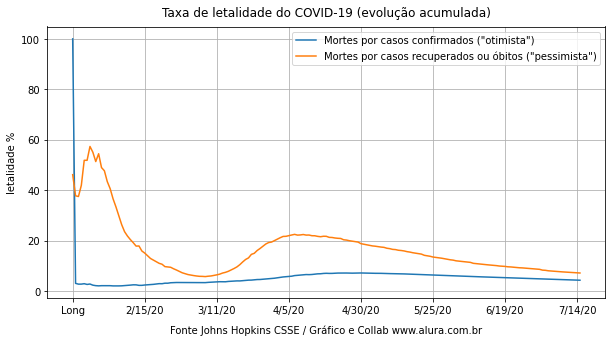

In [172]:
fig = plt.figure(figsize=(10,5))
grouped_per_day["letality_rate_1"].plot()
ax = grouped_per_day["letality_rate_2"].plot()
plt.legend(['Mortes por casos confirmados ("otimista")', 'Mortes por casos recuperados ou óbitos ("pessimista")'])
plt.title("Taxa de letalidade do COVID-19 (evolução acumulada)", pad=10)
plt.grid(linestyle='-')
ax.set_ylabel("letalidade %")
ax.set_xlabel("Fonte Johns Hopkins CSSE / Gráfico e Collab www.alura.com.br", labelpad=10)
plt.show()

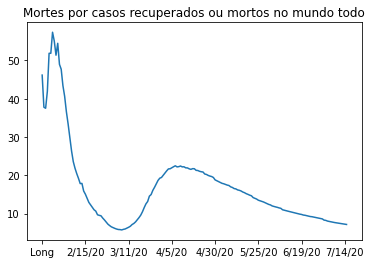

In [173]:
grouped_per_day["letality_rate_2"].plot()
plt.title("Mortes por casos recuperados ou mortos no mundo todo")
plt.show()

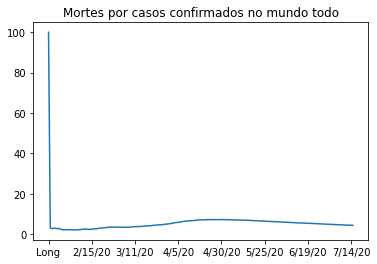

In [174]:
grouped_per_day["letality_rate_1"].plot()
plt.title("Mortes por casos confirmados no mundo todo")
plt.show()